<a href="https://colab.research.google.com/github/AhmedZaghl0ul/Machine-Learning/blob/main/Face_Mesh_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from IPython.display import Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = '📸 Capture';
      div.appendChild(capture);
      document.body.appendChild(div);
      const video = document.createElement('video');
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
  ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [13]:
photo_path = take_photo()
print("تم التقاط الصورة:", photo_path)

<IPython.core.display.Javascript object>

تم التقاط الصورة: photo.jpg


In [1]:
import cv2
import os
import mediapipe as mp

In [15]:
image = cv2.imread("photo.jpg")

In [16]:
mp_face_mesh = mp.solutions.face_mesh.FaceMesh(refine_landmarks=True)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

result = mp_face_mesh.process(rgb_image)

In [17]:
height, width, channel = image.shape

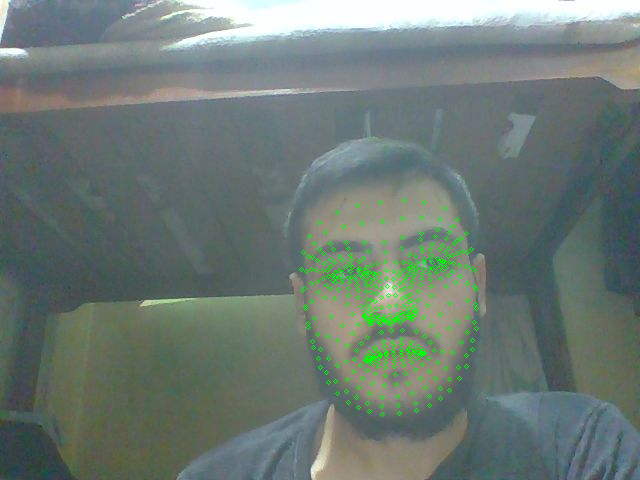

In [18]:
from google.colab.patches import cv2_imshow

for f in result.multi_face_landmarks:
    for lm in f.landmark:
        x = int(lm.x * width)
        y = int(lm.y * height)
        cv2.circle(image, (x, y), 2, (0, 255, 0))

cv2_imshow(image)